In [1]:
from ml_utilities import ESC50
import numpy as np

Fetch and load a ESC50 repository

In [2]:
esc50_path = '/Volumes/Samsung_T5/DataSet Preparation/ESC-50 stuff/ESC-50'
esc50 = ESC50(esc50_path)

View instances within the repository

In [3]:
esc50.meta[0:3]

[OrderedDict([('filename', '1-100032-A-0.wav'),
              ('fold', '1'),
              ('target', '0'),
              ('category', 'dog'),
              ('esc10', 'True'),
              ('src_file', '100032'),
              ('take', 'A')]),
 OrderedDict([('filename', '1-100038-A-14.wav'),
              ('fold', '1'),
              ('target', '14'),
              ('category', 'chirping_birds'),
              ('esc10', 'False'),
              ('src_file', '100038'),
              ('take', 'A')]),
 OrderedDict([('filename', '1-100210-A-36.wav'),
              ('fold', '1'),
              ('target', '36'),
              ('category', 'vacuum_cleaner'),
              ('esc10', 'False'),
              ('src_file', '100210'),
              ('take', 'A')])]

Conversion to MNIST like repository

In [9]:
print(f'Folds:{esc50.get_folds(unique= True)}')

x_train, y_train, s_train, x_test, y_test, s_test = esc50.to_mnist(train_folds=[1,2,3,4], test_folds=[5], n_fft=2048, hop_length=256, flatten=True, cache_path='/Volumes/Samsung_T5/test/')

:45<00:23, 24.69it/s]
Fold: 100%|██████████| 2/2 [01:30<00:00, 45.05s/it]


View a subset of the MNIST data

In [10]:
x_train[0:3],y_train[0:3], s_train[0:3], x_test[0:3], y_test[0:3], s_test[0:3]

([array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
  array([235, 238, 253, ..., 255, 255, 251], dtype=uint8),
  array([127, 122, 128, ..., 235, 216, 209], dtype=uint8)],
 [0, 14, 36],
 [(1025, 862), (1025, 862), (1025, 862)],
 [array([140, 180, 143, ..., 255, 255, 247], dtype=uint8),
  array([142, 137, 130, ..., 255, 255, 255], dtype=uint8),
  array([ 78,  83,  95, ..., 255, 255, 255], dtype=uint8)],
 [2, 2, 2],
 [(1025, 862), (1025, 862), (1025, 862)])

In [11]:
# Confirming that the shape is 1d array
assert x_train[1].ndim == 1,'Expected 1D array'

# Fetch array shape
print(f'Current Shape: {x_train[1].shape} Original shape: {s_train[1]}')

Current Shape: (883550,) Original shape: (1025, 862)


## Visualise an MNIST spectrogram

Min 0 Max 255


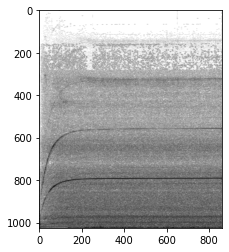

In [12]:
import numpy as np
import matplotlib.pyplot as plt
record_number = 2
print(f'Min {x_train[record_number].min()} Max {x_train[record_number].max()}')
bit = np.reshape(x_train[record_number], s_train[record_number]).astype(float)
plt.subplot(111)
plt.imshow(np.flip(bit,0), cmap='gray')

In [13]:
x_train[record_number]

array([127, 122, 128, ..., 235, 216, 209], dtype=uint8)

# Generate spectrogram

In [14]:
destination = '/Volumes/Samsung_T5/test/spectrograms'
mnist = esc50.generate_spectrograms(dest_path = destination, n_fft=2048, hop_length=256, dest_exists_ok=True, y_axis='linear', raw = True, image_exists_mode='replace')

 34%|███▎      | 674/2000 [10:50<22:31,  1.02s/it]